In [1]:
%pylab inline

import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+sqrt(5))/2)])

Populating the interactive namespace from numpy and matplotlib


In [2]:
# This function makes the plots look prettier on GitHub. 
### to do: figure out how to make this automatic.

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

In [3]:
k = 0.8
lurking = np.random.normal(loc=0.,scale=1.,size=80)
response = sqrt(1-k**2)*np.random.normal(loc=0.,scale=1.,size=80)+k*lurking
population = pd.DataFrame(np.array([lurking,response]).T,columns=['lurking','response'])
population.describe()

,lurking,response
count,80.000000,80.000000
mean,-0.008197,0.015825
std,1.086639,1.115231
min,-2.255971,-2.281606
25%,-0.869702,-0.684617
50%,-0.020406,0.101391
75%,0.771724,0.751245
max,2.467986,3.296618


,lurking,response
lurking,1.00000,0.88869
response,0.88869,1.00000


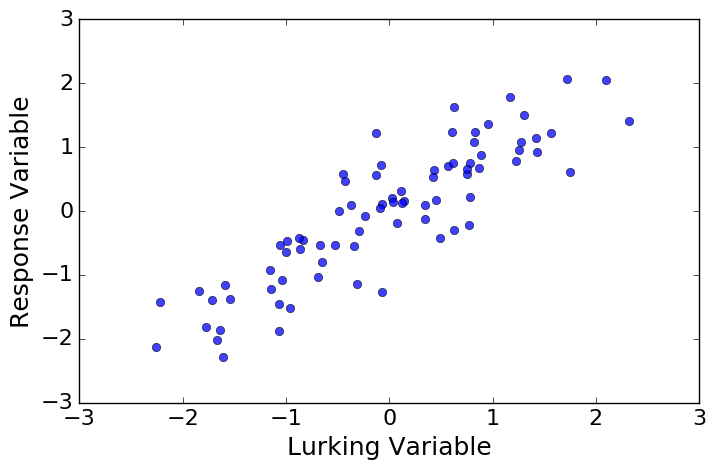

In [4]:
figure(figsize=gold)
plot(lurking,response,'o',alpha=0.75)
xlabel("Lurking Variable",fontsize=18)
ylabel("Response Variable",fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
axis([-3,3,-3,3])
population.corr()

In [8]:
def random_design(data,n,blockvar=None):
    idx = np.array(data.index)
    np.random.shuffle(idx)
    N = len(idx)//n
    blocks = {}
    for i in range(n):
        blocks[i+1] = idx[i*N:(i+1)*N]
    return blocks

def blocked_design(data,n,blockvar):
    idx = np.array(data.sort_values(by=blockvar).index)
    idx = idx.reshape((len(idx)//n,n))
    for i in range(len(idx)//n):
        np.random.shuffle(idx[i])
    blocks = {}
    for i in range(n):
        blocks[i+1] = idx[:,i]
    return blocks

def design(data,design_type):
    sorter = {'random':random_design, 'blocked':blocked_design}
    blocks = sorter[design_type](data,4,'lurking')
    experiment = pd.DataFrame(columns=['G1idx','G1lurk','G1resp',
                                       'G2idx','G2lurk','G2resp',
                                       'G3idx','G3lurk','G3resp',
                                       'G4idx','G4lurk','G4resp'])
    for i,j,k,l in zip(blocks[1],blocks[2],blocks[3],blocks[4]):
        new_data = {'G1idx':'{}'.format(i),'G1lurk':data['lurking'][i], 'G1resp':data['response'][i],
                    'G2idx':'{}'.format(j),'G2lurk':data['lurking'][j], 'G2resp':data['response'][j],
                    'G3idx':'{}'.format(k),'G3lurk':data['lurking'][k], 'G3resp':data['response'][k],
                    'G4idx':'{}'.format(l),'G4lurk':data['lurking'][l], 'G4resp':data['response'][l]}
        experiment = experiment.append(new_data,ignore_index=True)
    return experiment

In [9]:
experiment_response = pd.DataFrame(columns=['G1r','G2r','G3r','G4r','G1b','G2b','G3b','G4b'])
experiment_lurking = pd.DataFrame(columns=['G1r','G2r','G3r','G4r','G1b','G2b','G3b','G4b'])
for i in tqdm(range(500)):
    r_exp = design(population,'random')
    b_exp = design(population,'blocked')
    
    new_data = {'G1r':r_exp.mean()['G1resp'],
                'G2r':r_exp.mean()['G2resp'],
                'G3r':r_exp.mean()['G3resp'],
                'G4r':r_exp.mean()['G4resp'],
                'G1b':b_exp.mean()['G1resp'],
                'G2b':b_exp.mean()['G2resp'],
                'G3b':b_exp.mean()['G3resp'],
                'G4b':b_exp.mean()['G4resp']}
    experiment_response = experiment_response.append(new_data,ignore_index=True)
    
    new_data = {'G1r':r_exp.mean()['G1lurk'],
                'G2r':r_exp.mean()['G2lurk'],
                'G3r':r_exp.mean()['G3lurk'],
                'G4r':r_exp.mean()['G4lurk'],
                'G1b':b_exp.mean()['G1lurk'],
                'G2b':b_exp.mean()['G2lurk'],
                'G3b':b_exp.mean()['G3lurk'],
                'G4b':b_exp.mean()['G4lurk']}
    experiment_lurking = experiment_lurking.append(new_data,ignore_index=True)

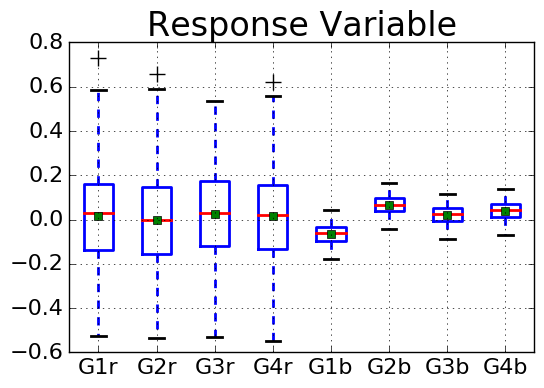

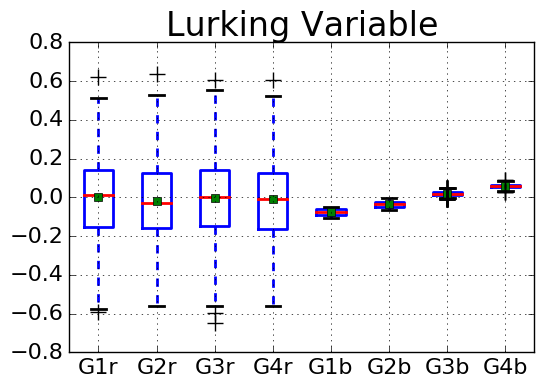

In [10]:
parts = experiment_response.boxplot(showmeans=True,figsize=gold,fontsize=16,return_type='dict')
fix_boxplot(parts)
yticks(fontsize=16)
title("Response Variable",fontsize=24)
figure()
parts = experiment_lurking.boxplot(showmeans=True,figsize=gold,fontsize=16,return_type='dict')
fix_boxplot(parts)
yticks(fontsize=16)
title("Lurking Variable",fontsize=24)